In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import glob

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÌÖåÎßà ÏÑ§Ï†ï
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# Î≥µÏû°Ìïú ÌÜµÍ≥Ñ Ï≤òÎ¶¨Î•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from scipy import stats

In [2]:
# data_type = "train"
# month = "07"
# category = "ÏûîÏï°Ï†ïÎ≥¥"

# local
root_path = '../../data'

# colab
# root_path = '/content/drive/MyDrive/12·Ñå·Ö© ·Ñë·Ö°·Ñã·Öµ·ÑÇ·Ö•·ÜØ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data'

#drive_folder = f'{root_path}/Ïä§ÌÉØÌã∞Ï¶à_Raw_data/'

In [3]:
df1 = pd.read_csv(f'{root_path}/KBO FA Ìà¨Ïàò [2013-2024]_ÏµúÏ¢Ö_Ï†ÑÏ≤òÎ¶¨_ver03.csv', encoding='utf-8')

- FA 1ÎÖÑÏ∞® Ï†úÏô∏ -> FA 1ÎÖÑÏ∞®Îäî FA ÎêòÍ≥† ÎÇú ÌõÑ Ïä§ÌÖüÎì§, Í∑∏ Ï†Ñ ÎÖÑÎì§ Ïä§ÌÖüÏúºÎ°ú ÏÇ¥Ìé¥Î¥êÏïºÌï®
- Ìï¥Ïô∏Ïùò Í∏∞Î°ù Ï†úÏô∏Ìï®

In [4]:
# 1. FA 1ÎÖÑÏ∞® Ï†úÏô∏ + Ìï¥Ïô∏Í≥ÑÏïΩÏûê Ï†úÏô∏
df_cleaned = df1[
    (df1['Íµ¨Î∂Ñ'] != 'FA 1ÎÖÑÏ∞®') & 
    (~df1['Íµ¨Î∂Ñ'].str.contains('Ìï¥Ïô∏'))
].copy()

In [5]:
# 2. ÌèâÍ∑† ÎÇº Ïä§ÌÉØ Ïª¨Îüº
stat_cols = ['Ï¢ÖÌï© WAR', 'ERA', 'Ïù¥ÎãùÏàò', 'ÌÉàÏÇºÏßÑ', 'Î≥ºÎÑ∑ÌóàÏö©', 'FIP', 'Ìà¨Íµ¨Ïàò', 'ÌîºÏû•ÌÉÄÏú®', 'ÏÇ¨ÏÇ¨Íµ¨', 'ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä']

In [6]:
# 3. ÏÑ†ÏàòÎ≥Ñ ÌèâÍ∑† Ïä§ÌÉØ Í≥ÑÏÇ∞
stat_mean = df_cleaned.groupby('ÏÑ†ÏàòÎ™Ö')[stat_cols].mean().reset_index()
stat_mean.columns = ['ÏÑ†ÏàòÎ™Ö'] + [f'ÌèâÍ∑†_{col}' for col in stat_cols]

In [7]:
# 4-A. 'Ìà¨' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨: Ïö∞ ‚Üí Ïö∞Ìà¨, Ï¢å ‚Üí Ï¢åÌà¨
df_cleaned['Ìà¨'] = df_cleaned['Ìà¨'].apply(
    lambda x: 'Ïö∞Ìà¨' if 'Ïö∞' in str(x) else ('Ï¢åÌà¨' if 'Ï¢å' in str(x) else x)
)

In [8]:
# 4. ÏÑ†ÏàòÎ≥Ñ Ìè¨ÏßÄÏÖò Ï†ïÎ≥¥ Ï∂îÍ∞Ä (ÎåÄÌëúÍ∞í Ï∂îÏ∂ú)
pos_info = df_cleaned.groupby('ÏÑ†ÏàòÎ™Ö')[['Ìà¨', 'ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò']].agg(lambda x: x.mode().iloc[0]).reset_index()

In [9]:
# 5. Í≥ÑÏïΩ Ï¥ùÏï° + Í≥ÑÏïΩ Ïó∞Ïàò Ï†ïÎ≥¥
fa_contract = df1[df1['FA Í≥ÑÏïΩ Ïó∞Ïàò'] > 0][['ÏÑ†ÏàòÎ™Ö', 'FA Í≥ÑÏïΩ Ï¥ùÏï°', 'FA Í≥ÑÏïΩ Ïó∞Ïàò']].drop_duplicates('ÏÑ†ÏàòÎ™Ö')
fa_contract['Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°'] = fa_contract['FA Í≥ÑÏïΩ Ï¥ùÏï°'] / fa_contract['FA Í≥ÑÏïΩ Ïó∞Ïàò']

In [19]:
# 6. Î≥ëÌï©
merged = stat_mean.merge(pos_info, on='ÏÑ†ÏàòÎ™Ö').merge(fa_contract, on='ÏÑ†ÏàòÎ™Ö')

In [21]:
# 7. ÏõêÌï´ Ïù∏ÏΩîÎî©
df_encoded = pd.get_dummies(merged, columns=['Ìà¨', 'ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò'])

In [23]:
# 8. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº ÏÑ†ÌÉù
columns_for_corr = [col for col in df_encoded.columns if col.startswith('ÌèâÍ∑†_') or col.startswith('Ìà¨_') or col.startswith('ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò_')]
columns_for_corr.append('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')

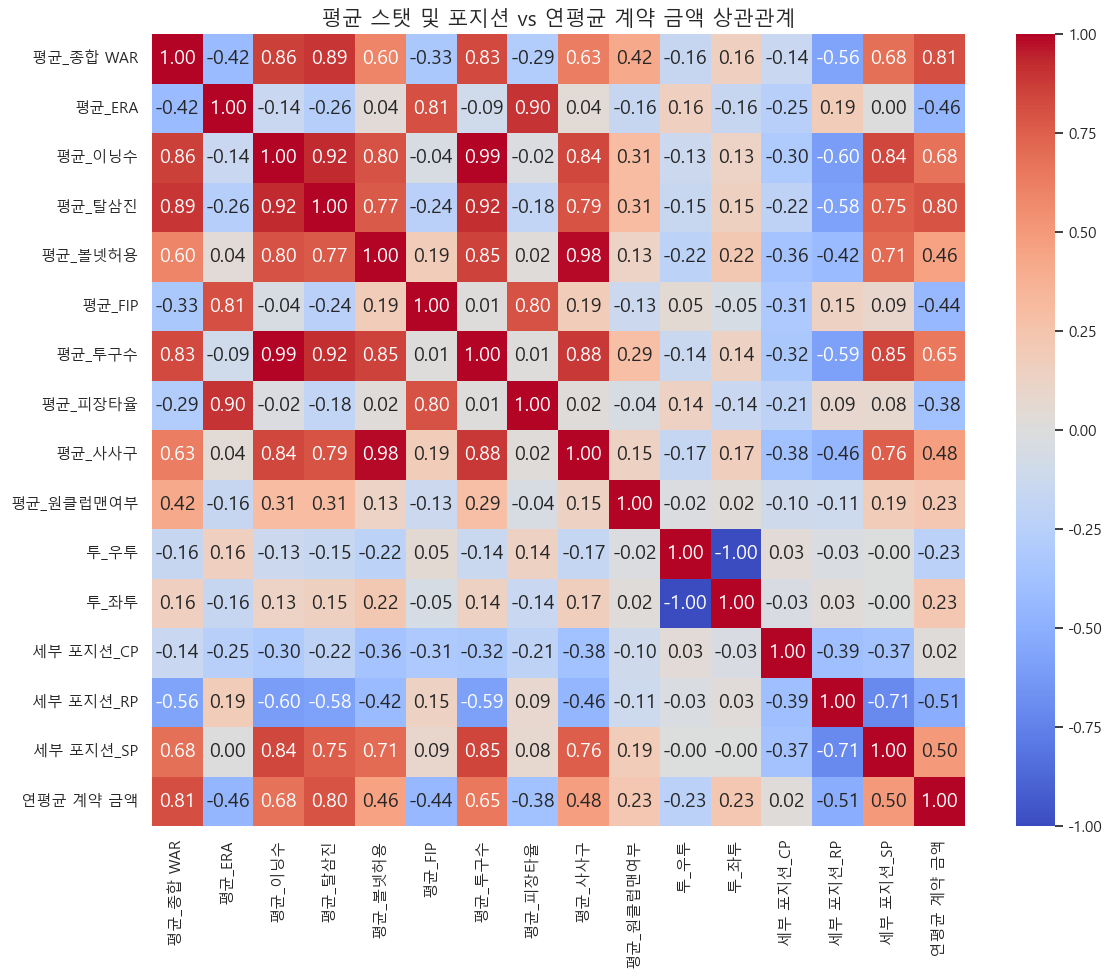

In [25]:
# 9. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
corr_df = df_encoded[columns_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("ÌèâÍ∑† Ïä§ÌÉØ Î∞è Ìè¨ÏßÄÏÖò vs Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï° ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=15)
plt.tight_layout()
plt.show()

## Ïä§ÌÖüÎì§ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à  (FA Í≥ÑÏïΩ Ï¥ùÏï° / FA Í≥ÑÏïΩ Ïó∞Ïàò)

- Ìï®Ïàò ÏÇ¨Ïö©

In [90]:
# ÏÇ∞Ï†êÎèÑ
def scatter_with_size(df, x_col, y_col='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=x_col,
        hue=x_col,
        palette='magma',
        sizes=(30, 200)
    )
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [100]:
# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
def binned_barplot_custom(df, x_col, y_col='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', bins=None, labels=None):
    df = df.copy()

    if bins is None or labels is None:
        raise ValueError("binsÏôÄ labelsÎäî Î∞òÎìúÏãú ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.")
    
    df['Íµ¨Í∞Ñ'] = pd.cut(df[x_col], bins=bins, labels=labels, right=False)

    grouped = df.groupby('Íµ¨Í∞Ñ', observed=False)[y_col].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped, x='Íµ¨Í∞Ñ', y=y_col, hue='Íµ¨Í∞Ñ', palette='flare')
    plt.title(f'{x_col} Íµ¨Í∞ÑÎ≥Ñ {y_col} ÌèâÍ∑†')
    plt.xlabel(f'{x_col} Íµ¨Í∞Ñ')
    plt.ylabel(f'{y_col} (Ïõê)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

### 1. Ïù¥ÎãùÏàò vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÏÑ†Î∞úÏù¥Î©¥ Ïù¥ÎãùÏàòÍ∞Ä ÎßéÏßÄ ÏïäÎÇò ..?)

- ÏÇ∞Ï†êÎèÑ

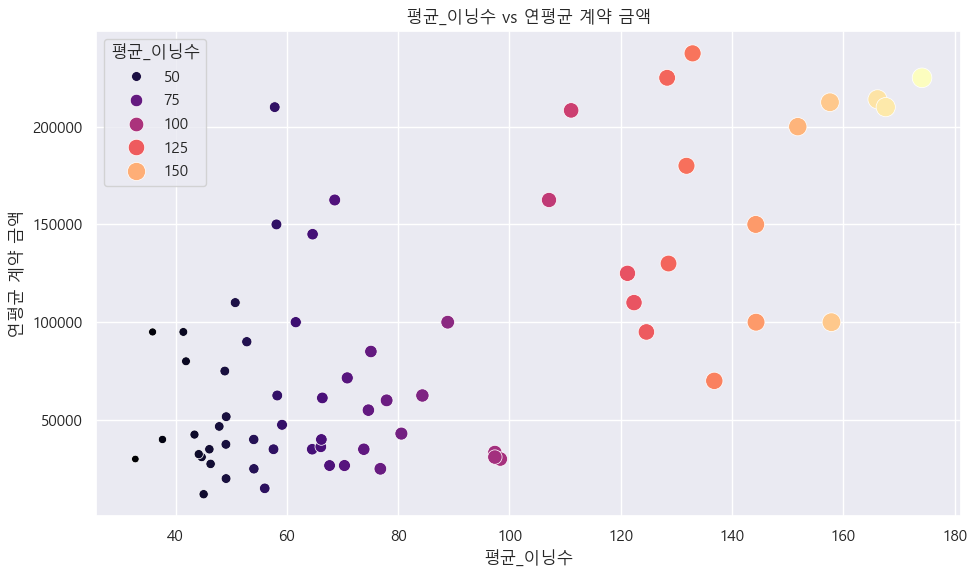

In [96]:
scatter_with_size(merged, 'ÌèâÍ∑†_Ïù¥ÎãùÏàò')

- ÎßâÎåÄ

In [108]:
merged['ÌèâÍ∑†_Ïù¥ÎãùÏàò'].min()

32.775

In [110]:
merged['ÌèâÍ∑†_Ïù¥ÎãùÏàò'].max()

174.125

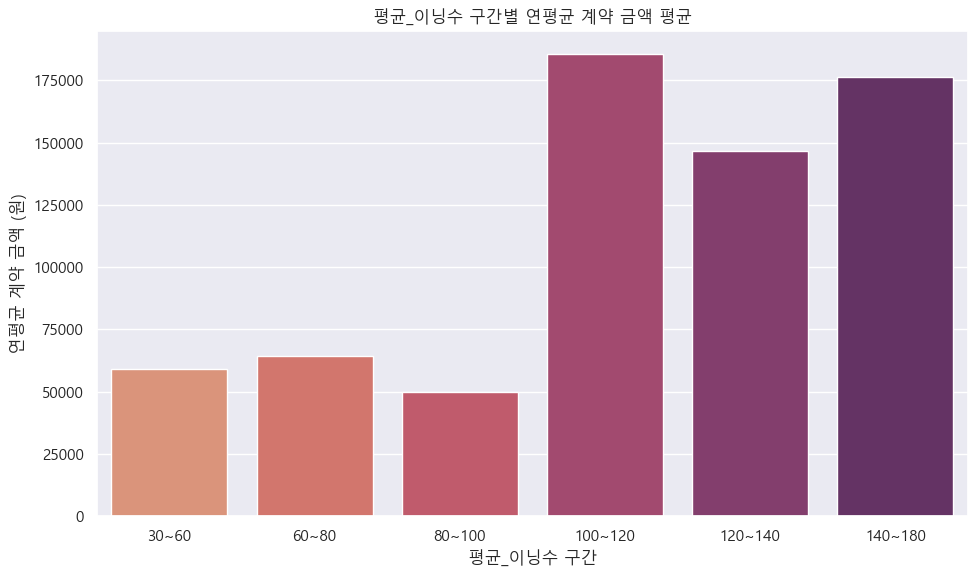

In [106]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Ïù¥ÎãùÏàò',
    bins=[30, 60, 80, 100, 120, 140, 180],
    labels=['30~60', '60~80', '80~100', '100~120', '120~140', '140~180']
)

In [115]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Ïù¥ÎãùÏàò', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Ïù¥ÎãùÏàòÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Ïù¥ÎãùÏàòÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.678


### 2. ERA vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

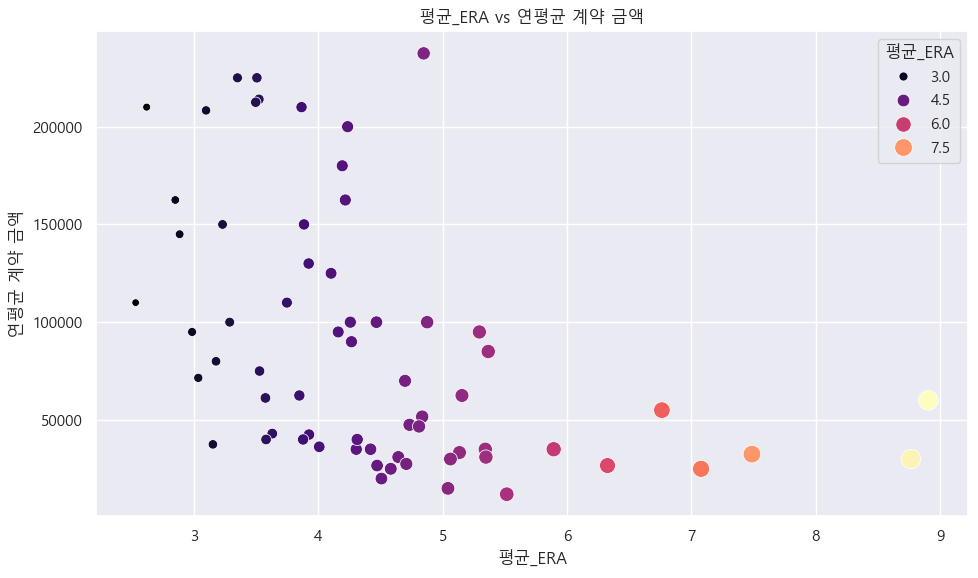

In [121]:
scatter_with_size(merged, 'ÌèâÍ∑†_ERA')

- ÎßâÎåÄ

In [123]:
merged['ÌèâÍ∑†_ERA'].min()

2.53125

In [125]:
merged['ÌèâÍ∑†_ERA'].max()

8.905

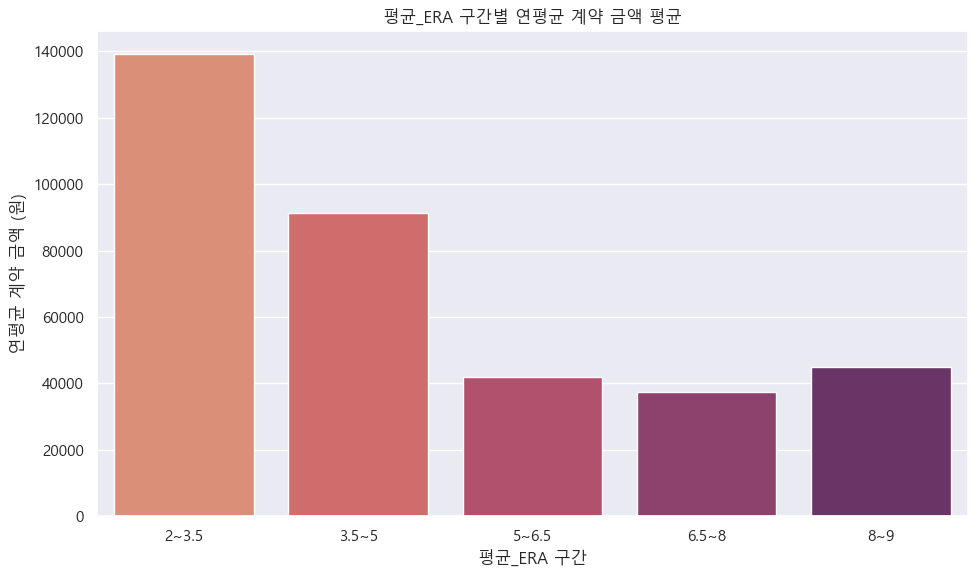

In [189]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ERA',
    bins = [2, 3.5, 5, 6.5, 8, 9],
    labels = ['2~3.5', '3.5~5', '5~6.5', '6.5~8', '8~9']
)

In [256]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ERA', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ERAÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ERAÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.456


### 3. Ï¢ÖÌï© WAR vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

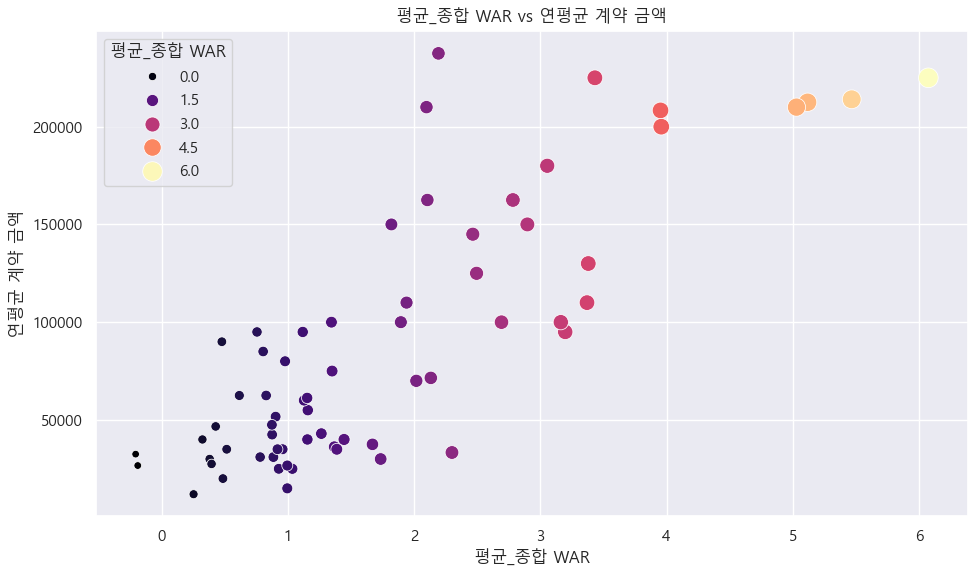

In [155]:
scatter_with_size(merged, 'ÌèâÍ∑†_Ï¢ÖÌï© WAR')

- ÎßâÎåÄ

In [158]:
merged['ÌèâÍ∑†_Ï¢ÖÌï© WAR'].min()

-0.20666666666666667

In [160]:
merged['ÌèâÍ∑†_Ï¢ÖÌï© WAR'].max()

6.075

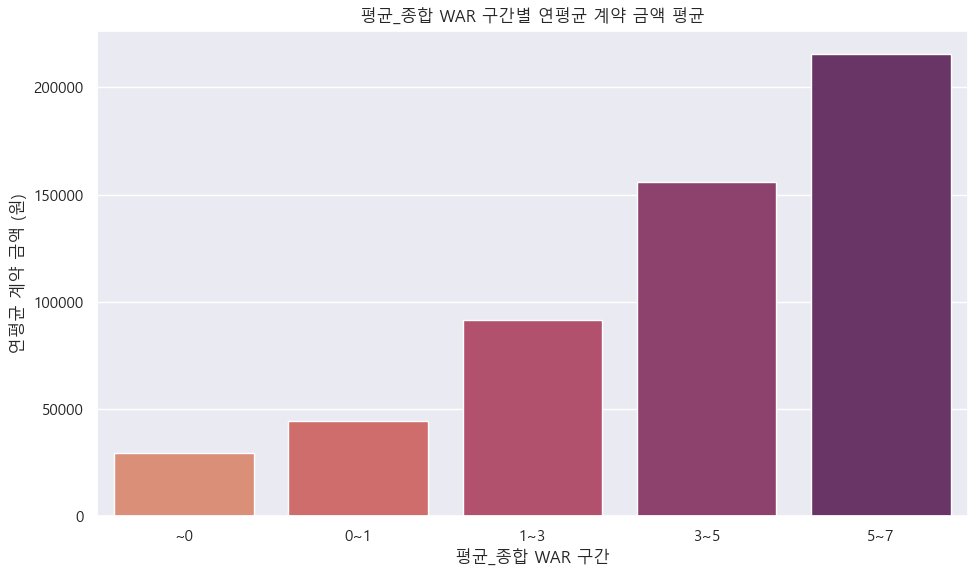

In [162]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Ï¢ÖÌï© WAR',
    bins = [-3, 0, 1, 3, 5, 7],
    labels = ['~0', '0~1', '1~3', '3~5', '5~7']
)

In [254]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Ï¢ÖÌï© WAR', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Ï¢ÖÌï© WARÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Ï¢ÖÌï© WARÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.815


### 4. ÌÉàÏÇºÏßÑ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÌÉàÏÇºÏßÑ Í∏∞Ï§Ä Î≥ÄÍ≤Ω ÌïÑÏöîÌï†ÏßÄÎèÑ)

- ÏÇ∞Ï†êÎèÑ

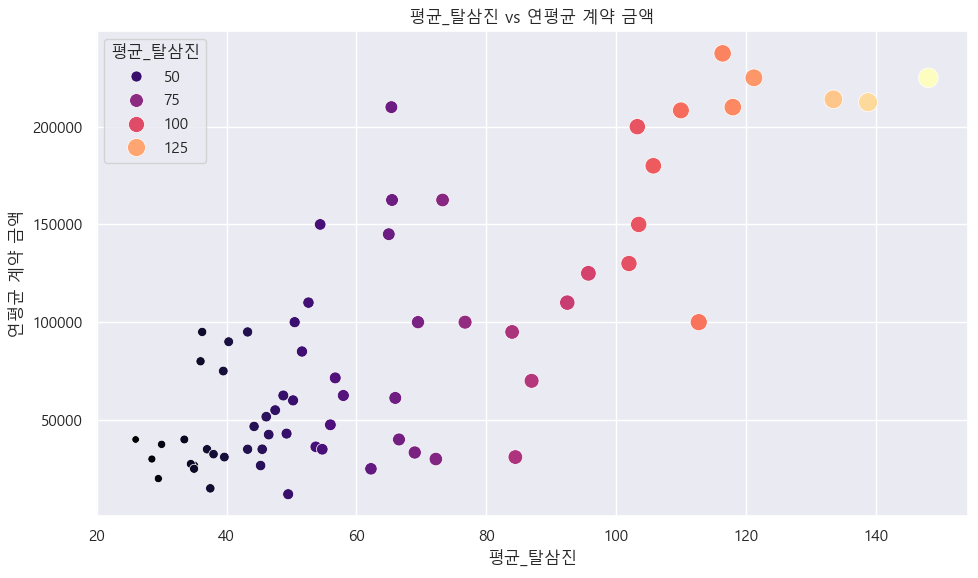

In [166]:
scatter_with_size(merged, 'ÌèâÍ∑†_ÌÉàÏÇºÏßÑ')

- ÎßâÎåÄ

In [173]:
merged['ÌèâÍ∑†_ÌÉàÏÇºÏßÑ'].min()

26.0

In [175]:
merged['ÌèâÍ∑†_ÌÉàÏÇºÏßÑ'].max()

148.125

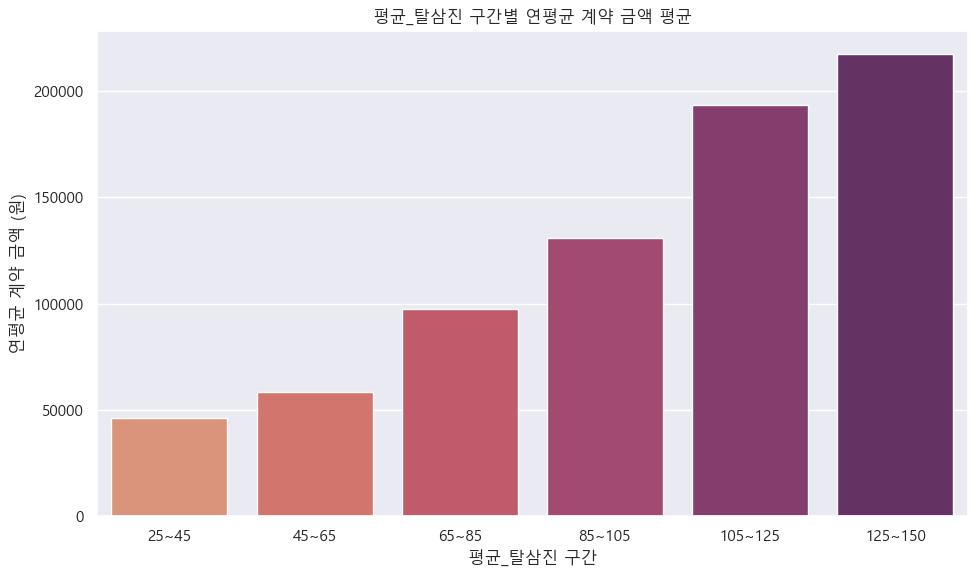

In [208]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ÌÉàÏÇºÏßÑ',
    bins = [25, 45, 65, 85, 105, 125, 150],
    labels = ['25~45','45~65','65~85','85~105','105~125','125~150']
)

In [252]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ÌÉàÏÇºÏßÑ', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ÌÉàÏÇºÏßÑÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ÌÉàÏÇºÏßÑÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.795


### 5. FIP vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

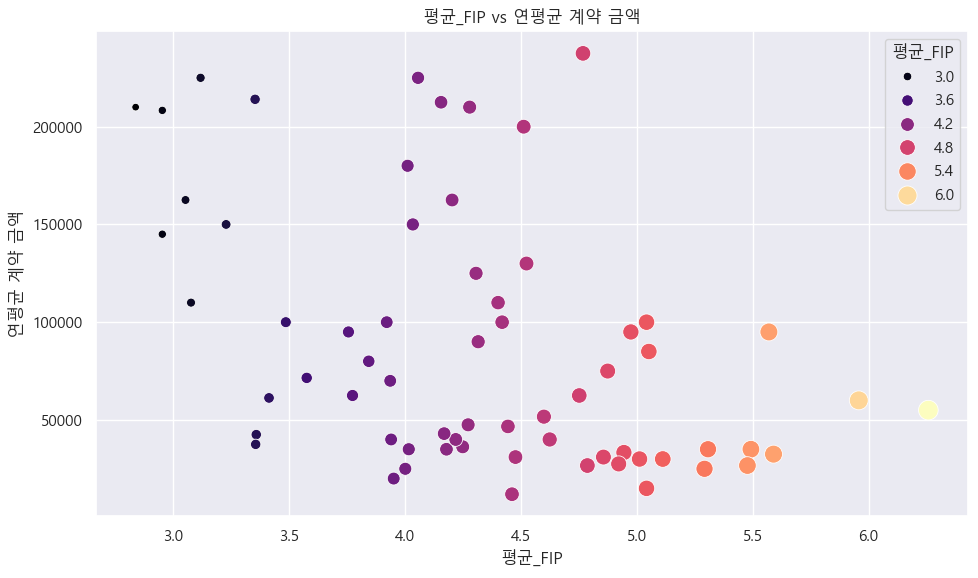

In [212]:
scatter_with_size(merged, 'ÌèâÍ∑†_FIP')

- ÎßâÎåÄ

In [215]:
merged['ÌèâÍ∑†_FIP'].min()

2.84

In [217]:
merged['ÌèâÍ∑†_FIP'].max()

6.2575

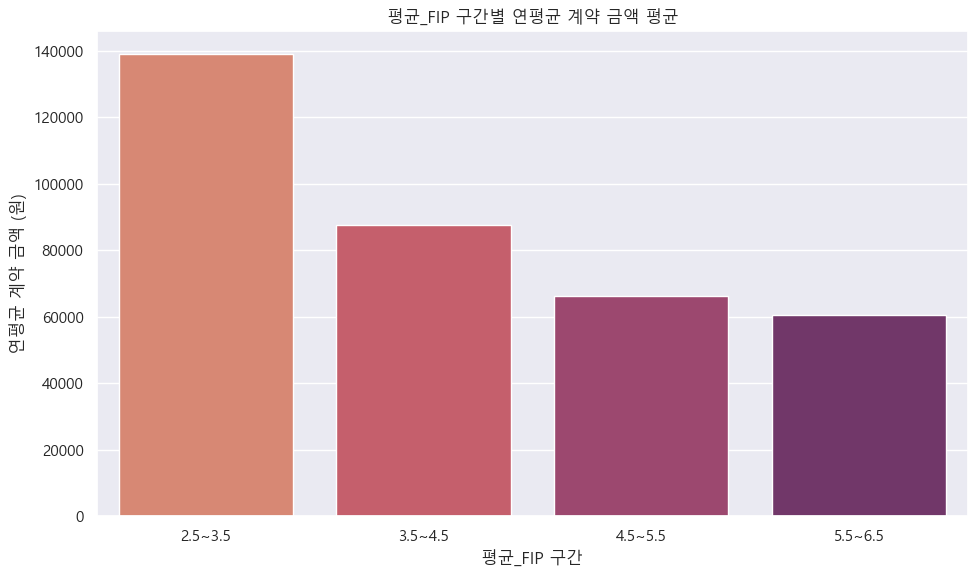

In [221]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_FIP',
    bins = [2.5, 3.5, 4.5, 5.5, 6.5],
    labels = ['2.5~3.5','3.5~4.5','4.5~5.5','5.5~6.5']
)

In [250]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_FIP', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† FIPÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† FIPÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.439


### 6. ÌîºÏû•ÌÉÄÏú® vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

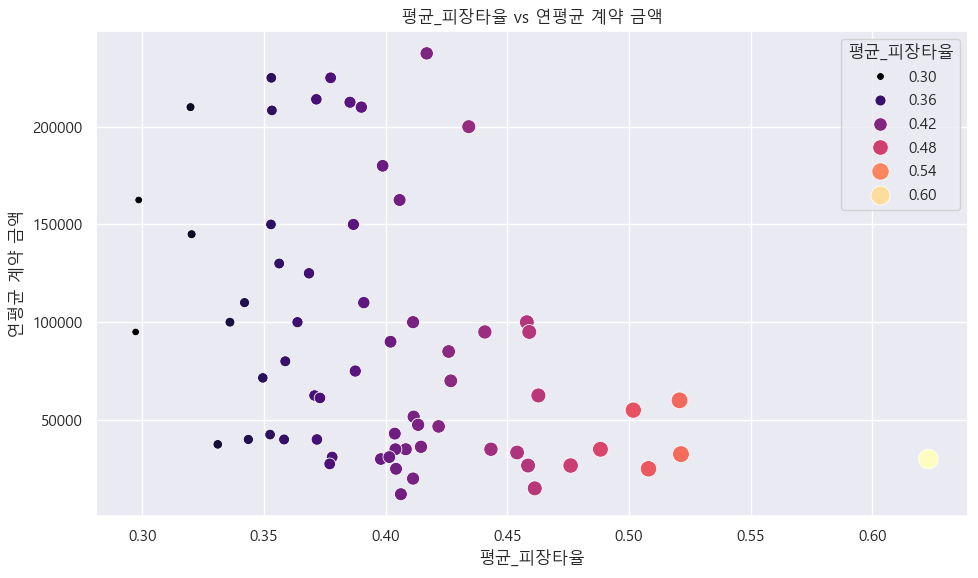

In [235]:
scatter_with_size(merged, 'ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®')

- ÎßâÎåÄ

In [240]:
merged['ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®'].min()

0.29725

In [242]:
merged['ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®'].max()

0.623

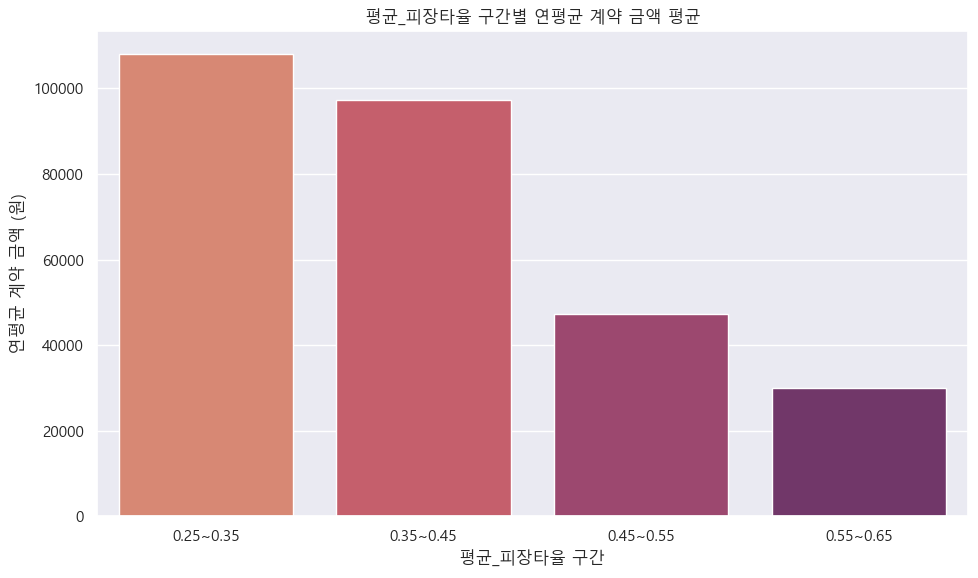

In [244]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®',
    bins = [0.25, 0.35, 0.45, 0.55, 0.65],
    labels = ['0.25~0.35','0.35~0.45','0.45~0.55','0.55~0.65']
)

In [248]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ÌîºÏû•ÌÉÄÏú®ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ÌîºÏû•ÌÉÄÏú®ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.376


### 7. Î≥ºÎÑ∑ÌóàÏö© vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÏùòÎØ∏X)

- ÏÇ∞Ï†êÎèÑ

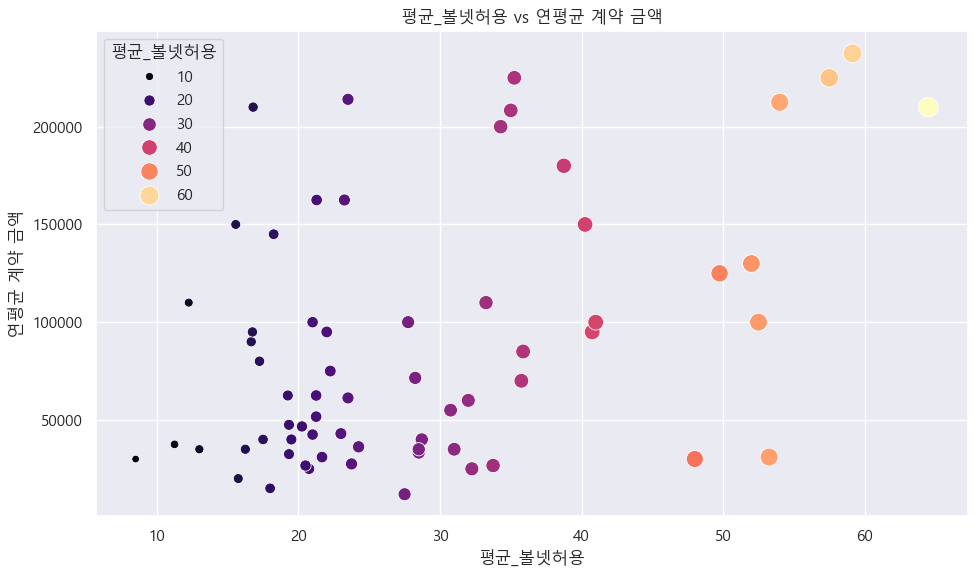

In [266]:
scatter_with_size(merged, 'ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©')

In [268]:
merged['ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©'].min()

8.5

In [270]:
merged['ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©'].max()

64.5

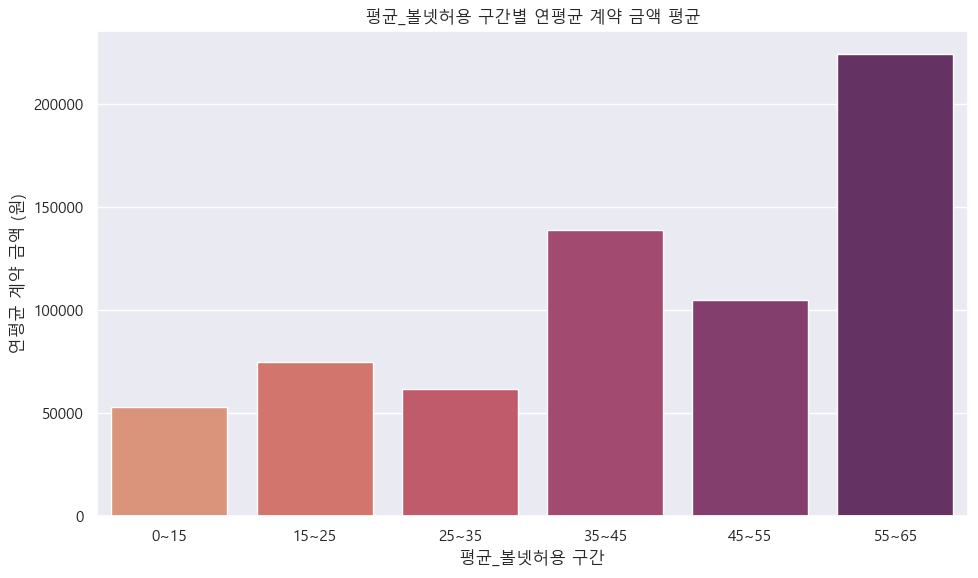

In [274]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©',
    bins = [0, 15, 25, 35, 45, 55, 65],
    labels = ['0~15','15~25','25~35','35~45','45~55','55~65']
)

In [276]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Î≥ºÎÑ∑ÌóàÏö©Í≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Î≥ºÎÑ∑ÌóàÏö©Í≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.457


### 8. Ìà¨Íµ¨Ïàò vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÎãπÏó∞Ìûà ÏÑ†Î∞úÏù¥ Ìà¨Íµ¨Ïàò ÎßéÏßÄ ÏïäÎÇò..)

- ÏÇ∞Ï†êÎèÑ

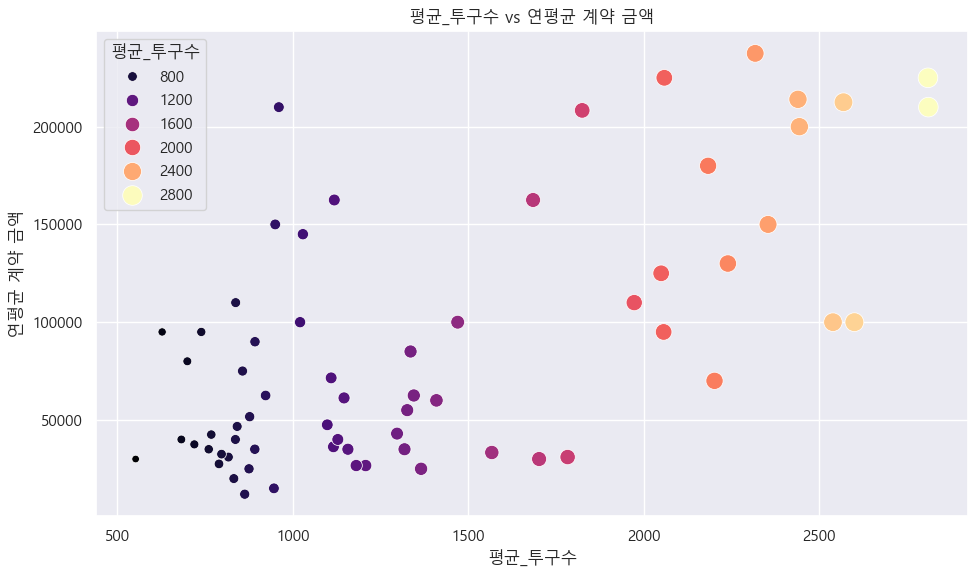

In [326]:
scatter_with_size(merged, 'ÌèâÍ∑†_Ìà¨Íµ¨Ïàò')

- ÎßâÎåÄ

In [328]:
merged['ÌèâÍ∑†_Ìà¨Íµ¨Ïàò'].min()

552.0

In [330]:
merged['ÌèâÍ∑†_Ìà¨Íµ¨Ïàò'].max()

2810.5

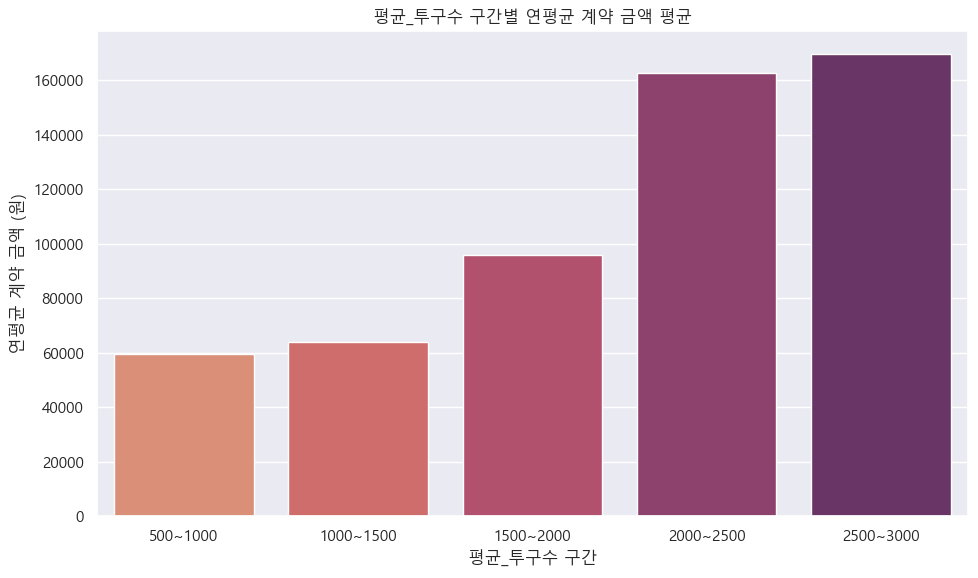

In [336]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Ìà¨Íµ¨Ïàò',
    bins = [500, 1000, 1500, 2000, 2500, 3000],
    labels = ['500~1000', '1000~1500', '1500~2000', '2000~2500', '2500~3000']
)

In [338]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Ìà¨Íµ¨Ïàò', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Ìà¨Íµ¨ÏàòÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Ìà¨Íµ¨Ïàò Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.652


### 9. ÏÇ¨ÏÇ¨Íµ¨ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (Î≥Ñ ÏùòÎØ∏ X)

- ÏÇ∞Ï†êÎèÑ

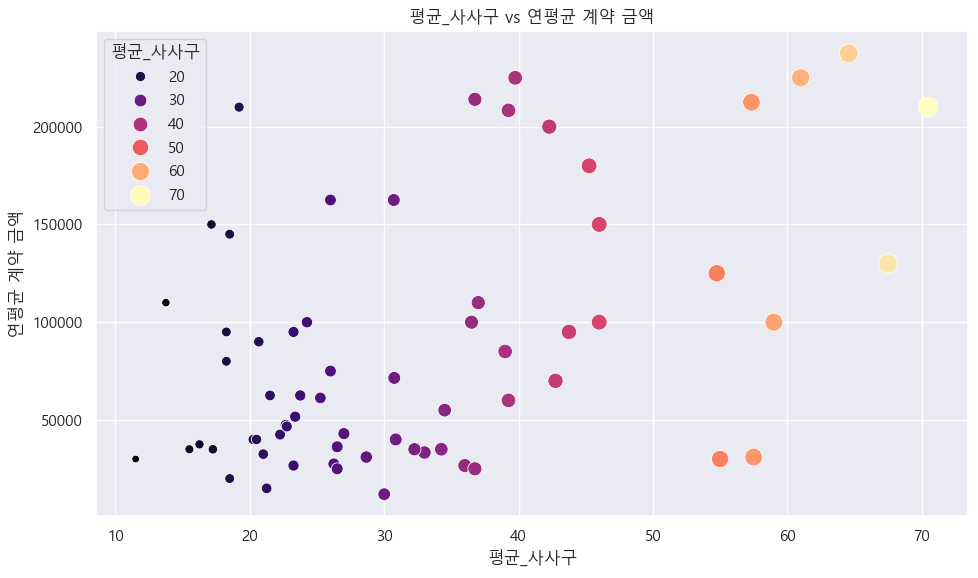

In [342]:
scatter_with_size(merged, 'ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨')

- ÎßâÎåÄ

In [346]:
merged['ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨'].min()

11.5

In [348]:
merged['ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨'].max()

70.5

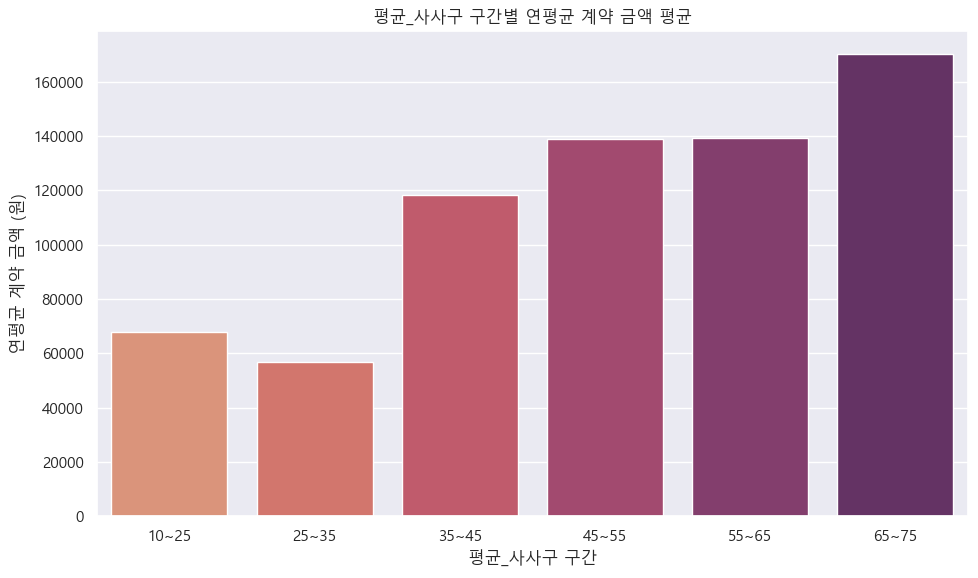

In [358]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨',
    bins = [10, 25, 35, 45, 55, 65, 75],
    labels = ['10~25', '25~35', '35~45', '45~55', '55~65', '65~75']
)

In [361]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ÏÇ¨ÏÇ¨Íµ¨ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ÏÇ¨ÏÇ¨Íµ¨ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.476


### 10. Ìà¨ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

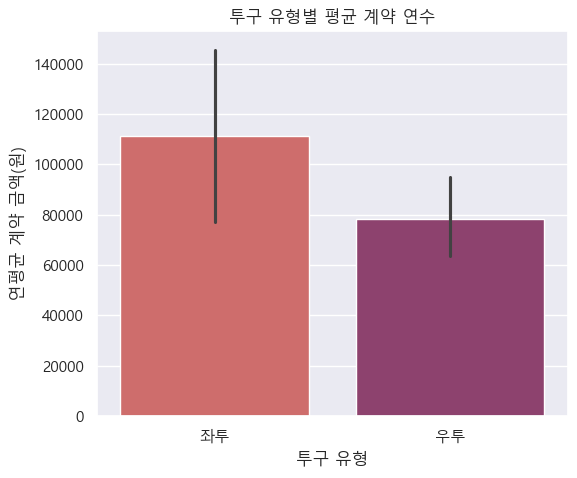

In [312]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='Ìà¨', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='Ìà¨', palette='flare')
plt.title('Ìà¨Íµ¨ Ïú†ÌòïÎ≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('Ìà¨Íµ¨ Ïú†Ìòï')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 11. ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

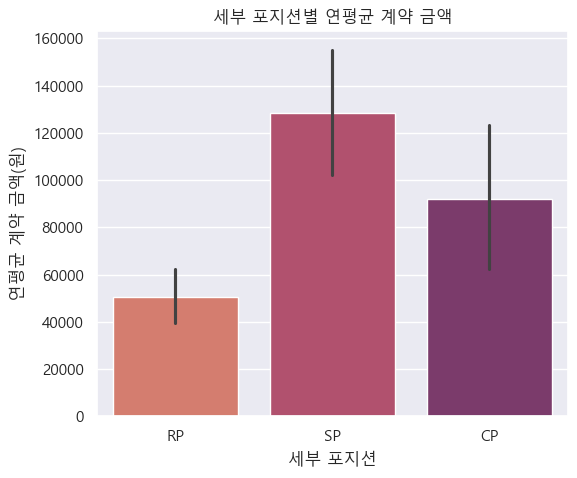

In [314]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò', palette='flare')
plt.title('ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖòÎ≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 12. ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

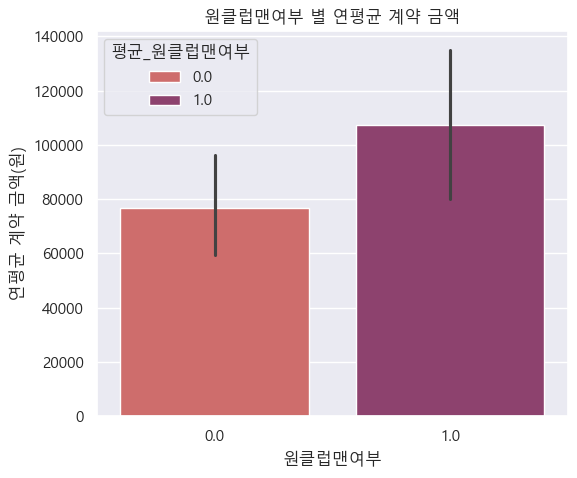

In [364]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='ÌèâÍ∑†_ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='ÌèâÍ∑†_ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä', palette='flare')
plt.title('ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä Î≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()